# Feature Extraction

딥러닝이 나오기 전에는 이미지를 서로 구분할 수 있는 핵심적 특징을 수치로 표현하고 이 수치를 분포 차이를 이용하여 이미지를 인식하는 방법을 사용했다. 이 방법은 훌륭하지만, Feature를 만들어 내는 것이 고통스러운 작업이다.

<img src="https://i.imgur.com/Yzq3JFD.jpg" width="100%">

(1, 3, 3, 1)


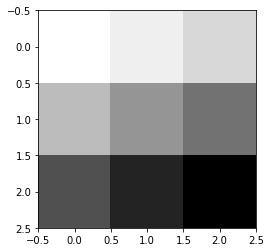

In [1]:
# cnnToyImage.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

print (image.shape)
plt.grid(False)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

In [6]:
weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape )
print(conv2d_img)

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


In [7]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d = tf.nn.relu(conv2d)
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)

conv2d_img.shape (1, 3, 3, 1)
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]


In [8]:
image=np.array([[[[1,1,1],[2,2,2],[3,3,3]],
                 [[4,4,4],[5,5,5],[6,6,6]],
                 [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print (image.shape)
weight=tf.constant([[[[1.],[1.],[1.]],[[1.],[1.],[1.]]],
                    [[[1.],[1.],[1.]],[[1.],[1.],[1.]]]])
print ("weight.shape", weight.shape)

conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

(1, 3, 3, 3)
weight.shape (2, 2, 3, 1)
conv2d_img.shape (1, 2, 2, 1)
[[[[36.]
   [48.]]

  [[72.]
   [84.]]]]


In [9]:
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

weight=tf.constant([[[[1.,10., -1.]],[[1.,10., -1.]]],
                    [[[1.,10., -1.]],[[1.,10., -1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)

weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


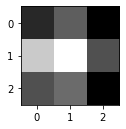

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


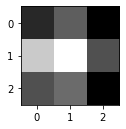

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


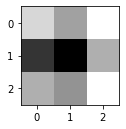

In [10]:
# plotting Code
conv2d_img=np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
    print (one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.grid(False), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

11493376/11490434 [==============================] - 0s 0us/step


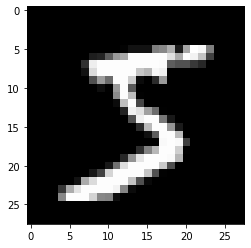

In [11]:
# Mnist_convLayer.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

img=train_x[0]
plt.imshow(img, cmap='gray')
plt.show()

In [12]:
img=img.reshape(-1,28,28,1)
W1=tf.random.normal([3,3,1,5], stddev=0.01)
W1

<tf.Tensor: shape=(3, 3, 1, 5), dtype=float32, numpy=
array([[[[ 0.0184574 , -0.01170227,  0.00828892, -0.01142316,
           0.00205196]],

        [[-0.0060019 , -0.00150527,  0.00422387,  0.00921819,
           0.0038018 ]],

        [[-0.04055589, -0.00293045,  0.0019571 ,  0.0254155 ,
           0.00314312]]],


       [[[-0.01401243, -0.00277041,  0.01457643, -0.00421239,
          -0.01014566]],

        [[ 0.02243598,  0.0225643 , -0.00235105,  0.00738867,
          -0.00871697]],

        [[ 0.00612691, -0.00629935,  0.00136519,  0.01544933,
          -0.00366551]]],


       [[[ 0.00063295, -0.00122113,  0.00763885, -0.00881646,
           0.00395189]],

        [[ 0.00226791,  0.00230267, -0.01173156, -0.01526328,
          -0.00885781]],

        [[-0.00649816, -0.00420148,  0.00868593, -0.00731919,
          -0.01122164]]]], dtype=float32)>

conv2d_img (1, 14, 14, 5)


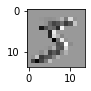

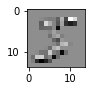

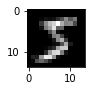

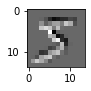

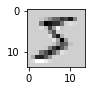

In [13]:
conv2d=tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
conv2d_img=conv2d.numpy()
print('conv2d_img',conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray'), plt.show()

pool_img (1, 7, 7, 5)


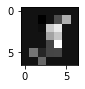

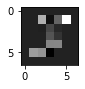

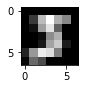

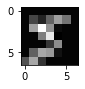

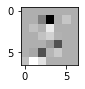

In [17]:
pool=tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
pool_img=pool.numpy()
print('pool_img',pool_img.shape)
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray'), plt.show()

In [0]:
# Mnist_CNN_TF2.ipynb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
model = models.Sequential()
# (B, 28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))    # w: 1*3*3*32+32=320
# (B, 26, 26, 32)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 13, 13, 32)
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # w: 32*3*3*64+64=18496
# (B, 11, 11, 64)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 5, 5, 64)
model.add(layers.Flatten())
# (B, 1600)
model.add(layers.Dense(10, activation='softmax'))       # w: 1600*10+10=16010
# (B, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_y_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1591 - accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9925


In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 1s - loss: 0.0273 - accuracy: 0.9917


In [23]:
print(test_acc)

0.9916999936103821


# Question

1. CNN에서 C는 무엇인가?
 * convolutional

2. Mnist CNN의 정확도는?
 * 99%